In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split as split
from sklearn import svm

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("spambase.csv")

# 1

In [3]:
w = [7,17,27,37,47,57]
X =[0]*6
y = [0]*6
sum_acc = []
sum_std = []
train_acc_std = []
test_acc_std = []

In [4]:
data.shape

(4601, 58)

In [5]:
# 1

In [6]:

for z in range(6):
    i = w[z]
    X[z] = data.iloc[:,0:i]
    y[z] = data.iloc[:,-1]
    acc = []
    acctr =[]
    accts = []
    for j in range(100):
        train_x,test_x,train_y,test_y = split(X[z],y[z],test_size=0.3) 
        model = svm.SVC(C=1,kernel = "linear")
        model.fit(train_x,train_y)
        acc.append(model.score(X[z],y[z]))
        acctr.append(model.score(train_x,train_y))
        accts.append(model.score(test_x,test_y))
    print("When w = ",i,)
    print("the average of accuracy:",np.mean(acc))
    print("the std of accuracy:",np.std(acc))
    sum_acc.append(np.mean(acc))
    sum_std.append(np.std(acc))
    train_acc_std.extend([np.mean(acctr),np.std(acctr)])
    test_acc_std.extend([np.mean(accts),np.std(accts)])

    
        


When w =  7
the average of accuracy: 0.756663768745925
the std of accuracy: 0.003344005520327287
When w =  17
the average of accuracy: 0.8321734405564007
the std of accuracy: 0.002577347703988905
When w =  27
the average of accuracy: 0.8934731580091282
the std of accuracy: 0.0019864473838761836
When w =  37
the average of accuracy: 0.8960334709845686
the std of accuracy: 0.002466519896769947
When w =  47
the average of accuracy: 0.9154401217126711
the std of accuracy: 0.0024794032207134963
When w =  57
the average of accuracy: 0.9336731145403173
the std of accuracy: 0.001820522125378134


In [7]:
train_res = np.array(train_acc_std)
avg_tr,std_tr = np.split(train_res.reshape(6,2),2,axis=1)
test_res = np.array(test_acc_std)
avg_te,std_te = np.split(test_res.reshape(6,2),2,axis=1)


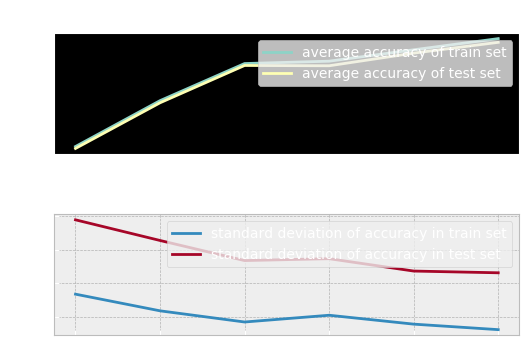

In [8]:
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.figure(1)
plt.subplots_adjust(wspace =0, hspace =0.5)#调整子图间距
plt.subplot(211)
plt.style.use("bmh")
plt.xticks(w)
plt.title("average accuracy")
plt.plot(w,avg_tr,label = "average accuracy of train set")
plt.plot(w,avg_te,label = "average accuracy of test set")
plt.legend(loc='upper right')
plt.subplot(212)
plt.style.use("bmh")
plt.title("standard deviation of accuracy")
plt.xticks(w)
plt.plot(w,std_tr,label = "standard deviation of accuracy in train set")
plt.plot(w,std_te,label = "standard deviation of accuracy in test set")
plt.legend(loc='upper right')

### Discussion:


When more features are used in the model, the model will fit better, so the accuracy on the training set and test set will increase. The accuracy rate on the test set will be lower than that on the training set.


The more feature models included are closer to the real model, so the accuracy of the training will continue to converge and the variance will continue to decrease.

# 2

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [10]:
c = [0.001,0.01,0.05,0.1,0.5,1,10]

In [11]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
scores  = []
margins = []

In [12]:
for i in range(7):
    z = c[i]
    model = svm.SVC(C = z,kernel="linear")
    score = []
    margin = []
    rkf = RepeatedKFold(n_splits =10,n_repeats=1,random_state=i)
    for train_index,test_index in rkf.split(X):
        train_x,test_x = X.iloc[train_index,:],X.iloc[test_index,:]
        train_y,test_y = y[train_index],y[test_index]
        model.fit(train_x,train_y)
        score.append(model.score(test_x,test_y))
        margin.append(2*np.mean(np.abs(model.decision_function(model.support_vectors_))))
    print("When c = ",z)
    print("The average accuracy on valid set:",np.mean(score))
    print("The average std of accura    cy on valid set:",np.std(score))
    scores.extend([np.mean(score),np.std(score)])
    print("The average margin of the SVM:",2*np.mean(np.abs(model.decision_function(model.support_vectors_))))
    margins.append(2*np.mean(np.abs(model.decision_function(model.support_vectors_))))


        
        


When c =  0.001
The average accuracy on valid set: 0.8754621333584834
The average std of accura    cy on valid set: 0.011745934165493055
The average margin of the SVM: 1.1614088769871747
When c =  0.01
The average accuracy on valid set: 0.9178378760728096
The average std of accura    cy on valid set: 0.014138641983302386
The average margin of the SVM: 1.2923246881109187
When c =  0.05
The average accuracy on valid set: 0.9232783174573234
The average std of accura    cy on valid set: 0.011703506989634155
The average margin of the SVM: 1.4196368107913788
When c =  0.1
The average accuracy on valid set: 0.9230580967650663
The average std of accura    cy on valid set: 0.008989487316540968
The average margin of the SVM: 1.5012315550826978
When c =  0.5
The average accuracy on valid set: 0.929796284070546
The average std of accura    cy on valid set: 0.0119173021964248
The average margin of the SVM: 1.591915631003573
When c =  1
The average accuracy on valid set: 0.9311039328491935
The avera

(12,)

In [13]:
train_res = np.array(scores)
avg_acc,avg_std = np.split(train_res.reshape(7,2),2,axis=1)
margins = np.array(margins)


No handles with labels found to put in legend.


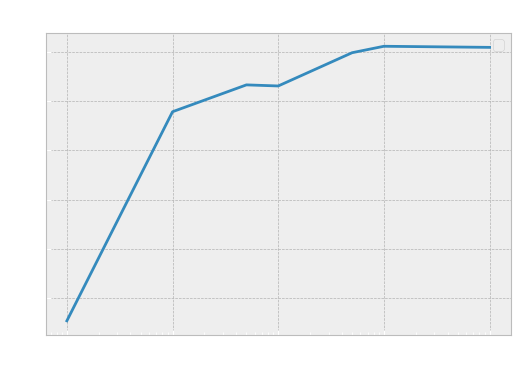

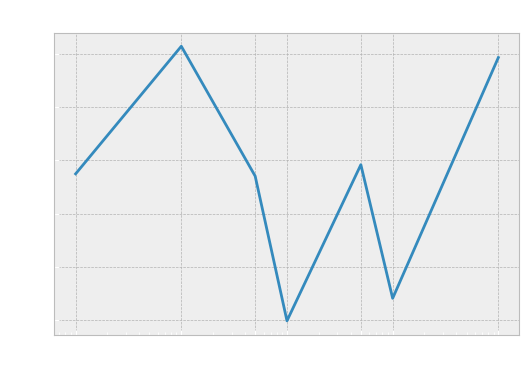

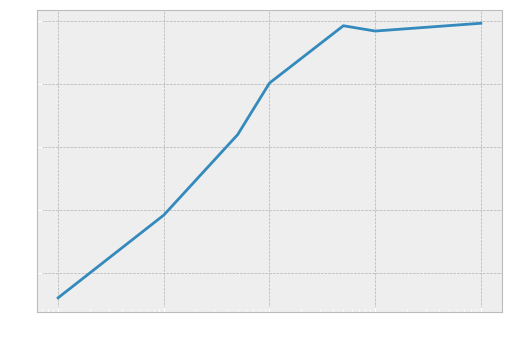

In [14]:
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.figure()

plt.style.use("bmh")
plt.xticks(c)
plt.axes(xscale = "log") 
plt.title("average accuracy")
plt.plot(c,avg_acc)
plt.legend(loc='upper right')

plt.figure()
plt.style.use("bmh")
plt.axes(xscale = "log") 
plt.title("standard deviation of accuracy")
plt.xticks(c)
plt.plot(c,avg_std)


plt.figure()
plt.style.use("bmh")
plt.title("average margins")
plt.xticks(c)
plt.axes(xscale = "log") 
plt.plot(c,margins)

### Choose C= 0.1 ,as the accuracy is high enough and the std of accuracy is low as well.

In [15]:
c

[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]

# 3

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [17]:
logclf = LogisticRegression()
svmclf = svm.SVC(kernel = "linear")
scores = []
precision_log=[]
precision_svm =[]
recall_log = []
recall_svm = []
rkf = RepeatedKFold(n_splits =10,n_repeats=1,random_state=9)
for train_index,test_index in rkf.split(X):
    train_x,test_x = X.iloc[train_index,:],X.iloc[test_index,:]
    train_y,test_y = y[train_index],y[test_index]
    logclf.fit(train_x,train_y)
    y_score = logclf.predict(test_x)
    svmclf.fit(train_x,train_y)
    y_score1 = svmclf.predict(test_x)
    precision_log.append(average_precision_score(test_y,y_score))
    precision_svm.append(average_precision_score(test_y,y_score1))
    recall_log.append(recall_score(test_y,y_score.round()))
    recall_svm.append(recall_score(test_y,y_score1.round()))
    scores.extend([logclf.score(test_x,test_y),svmclf.score(test_x,test_y)])
    

In [19]:
res = np.array(scores)
log_acc,svm_acc = np.split(res.reshape(10,2),2,axis=1)



In [20]:
print("The avg. accuracy:\nLogiscRegression:{:.4f};   SVM:{:.4f}\n".format(np.mean(log_acc),np.mean(svm_acc)))
print("The avg. std of accuracy:\nLogisticRegression:{:.4f}; SVM:{:.4F}\n".format(np.std(log_acc),np.std(svm_acc)))
print("The precision & recall:\nLogisticRegression:{:.4f}&{:.4f};   SVM:{:.4f}&{:.4f}".format(np.mean(precision_log),np.mean(recall_log),np.mean(precision_svm),np.mean(recall_svm)))



The avg. accuracy:
LogiscRegression:0.9287;   SVM:0.9318

The avg. std of accuracy:
LogisticRegression:0.0082; SVM:0.0075

The precision & recall:
LogisticRegression:0.8669&0.8930;   SVM:0.8719&0.8989


$ H_0: Accuracy_{Logistic} = Accuracy_{SVM}$

$ H_1: Accuracy_{Logistic} \neq Accuracy_{SVM}$

In [21]:
from scipy import stats
ts,pvalue = stats.ttest_ind(log_acc,svm_acc,equal_var = False)

In [22]:
if pvalue <= 0.05:
    print("reject the null hypothesis")
else:
    print("can't reject the null hypothesis")
    print("We can't say which model is better")

can't reject the null hypothesis
We can't say which model is better


array([0.84173044])